## Análisis de Expresión Diferencial de Genes


In [ ]:
#install DESeq2 using Bioconductor
if (!require('BiocManager', quietly = TRUE))
  install.packages('BiocManager')

BiocManager::install('DESeq2')

#Install EnhancedVolcano using Bioconductor
if (!require('BiocManager', quietly = TRUE))
  install.packages('BiocManager')

BiocManager::install('EnhancedVolcano')

Cargar las librerías

In [54]:
library(DESeq2)
library(EnhancedVolcano)

Cargar los DataSets

In [ ]:
# Nota: reemplazar el path con la ruta donde se ubica su archivo E-GEOD-60052-experiment-design.tsv
design <- read.delim(
  '/Users/alejo/OneDrive/Escritorio/diff_expression/E-GEOD-60052-experiment-design.tsv'
)
View(design)

In [ ]:
# Nota: reemplazar el path con la ruta donde se ubica su archivo E-GEOD-60052-raw-counts.tsv
raw.counts <- read.delim(
  '/Users/alejo/OneDrive/Escritorio/diff_expression/E-GEOD-60052-raw-counts.tsv'
)
View(raw.counts)

Aplicar labeling a los datos

In [82]:

design = design[1:86, ]

# Crear etiquetas para muestras normales y de cáncer primario
label1 = rep(c('normal'), 7)
label2 = rep(c('cancer'), 79)
labels = c(label1, label2)


# Cargar la tabla genética
# Seleccione los datos de las variables de interés y añada los nombres de los genes
dataset = raw.counts[, c('Gene.Name', design$Run)]
genetable = raw.counts[, design$Run]


# Crear el marco de datos de metadatos (Create the metadata dataframe)
Metadata = data.frame(id = design$Run, type = labels)

Número de muestras válidas: 86 


Realizar análisis DESeq2

In [93]:
dds = DESeqDataSetFromMatrix(genetable, Metadata, ~ type)
dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3111 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



Crear un objeto de resultados DESeq utilizando la corrección Benjamini-Hochberg

In [94]:
res = results(
  object = dds,
  contrast = c('type', 'normal', 'cancer'),
  pAdjustMethod = 'BH',
  alpha = 0.000001
)
row.names(res) = dataset$Gene.Name
summary(res)


out of 57790 with nonzero total read count
adjusted p-value < 1e-06
LFC > 0 (up)       : 109, 0.19%
LFC < 0 (down)     : 145, 0.25%
outliers [1]       : 0, 0%
low counts [2]     : 34509, 60%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Generar la visualización gráfica con EnhancedVolcano

Warning message:
"ggrepel: 1437 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


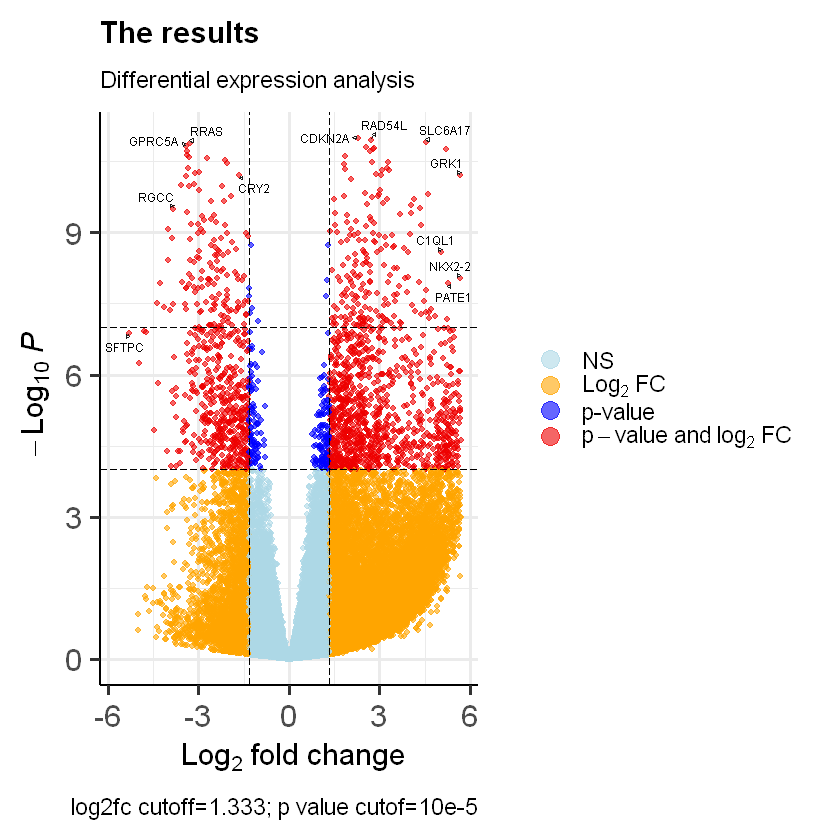

In [85]:
EnhancedVolcano(
  res,
  lab = dataset$Gene.Name,
  x = 'log2FoldChange',
  y = 'pvalue',
  pCutoff = 10e-5,
  FCcutoff = 1.333,
  xlim = c(-5.7, 5.7),
  ylim = c(0, -log10(10.2e-12)),
  pointSize = 1.3,
  labSize = 2.6,
  title = 'The results',
  subtitle = 'Differential expression analysis',
  caption = 'log2fc cutoff=1.333; p value cutof=10e-5',
  legendPosition = "right",
  legendLabSize = 14,
  col = c('lightblue', 'orange', 'blue', 'red2'),
  colAlpha = 0.6,
  drawConnectors = TRUE,
  hline = c(10e-8),
  widthConnectors = 0.5
)

Generar la visualización gráfica con EnhancedVolcano más estricto

Warning message:
"ggrepel: 156 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


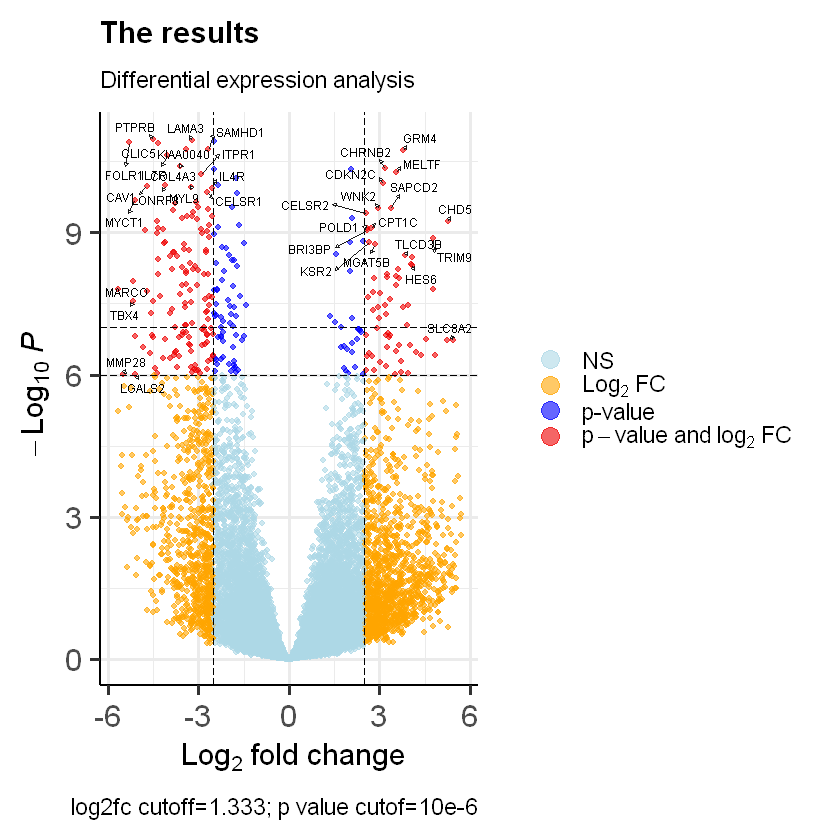

In [73]:
EnhancedVolcano(
  res,
  lab = dataset$Gene.Name,
  x = 'log2FoldChange',
  y = 'padj',
  pCutoff = 10e-7,
  FCcutoff = 2.5,
  xlim = c(-5.7, 5.7),
  ylim = c(0, -log10(10.2e-12)),
  pointSize = 1.3,
  labSize = 2.6,
  title = 'The results',
  subtitle = 'Differential expression analysis',
  caption = 'log2fc cutoff=1.333; p value cutof=10e-6',
  legendPosition = "right",
  legendLabSize = 14,
  col = c('lightblue', 'orange', 'blue', 'red2'),
  colAlpha = 0.6,
  drawConnectors = TRUE,
  hline = c(10e-8),
  widthConnectors = 0.5
)

Crear un objeto de resultados DESeq utilizando la corrección Holm para limpiar resultados falsos positivos

In [86]:
res = results(
  object = dds,
  contrast = c('type', 'cancer', 'normal'),
  pAdjustMethod = 'holm',
  alpha = 0.000001
)
row.names(res) = dataset$Gene.Name
summary(res)


out of 57790 with nonzero total read count
adjusted p-value < 1e-06
LFC > 0 (up)       : 42, 0.073%
LFC < 0 (down)     : 41, 0.071%
outliers [1]       : 0, 0%
low counts [2]     : 40073, 69%
(mean count < 21)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Generar la visualización gráfica con EnhancedVolcano luego de aplicar Holm

Warning message:
"ggrepel: 1437 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


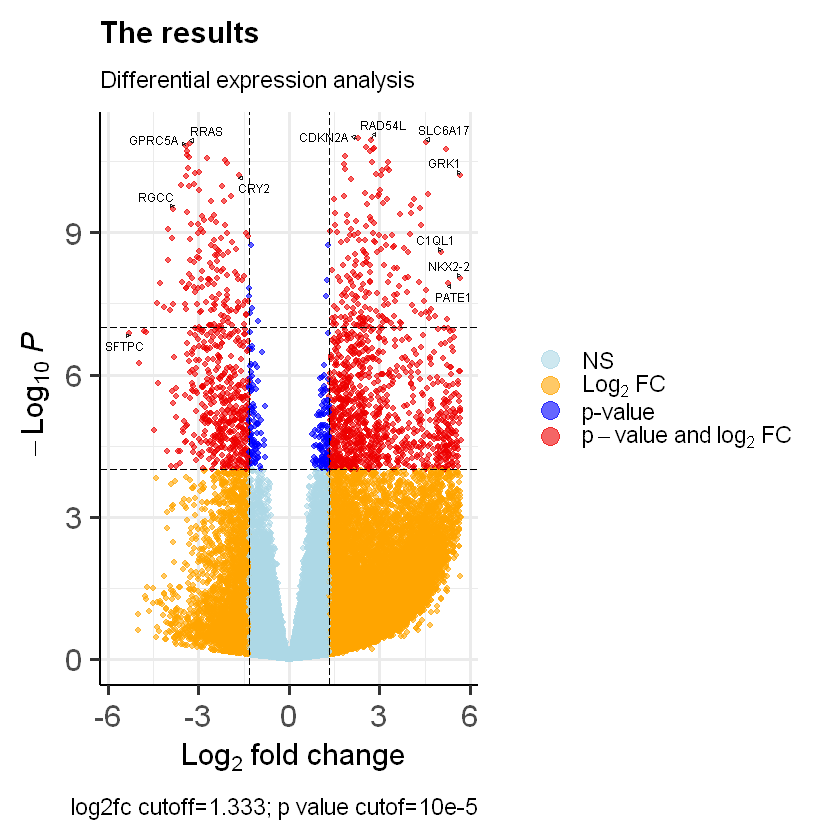

In [87]:
EnhancedVolcano(
  res,
  lab = dataset$Gene.Name,
  x = 'log2FoldChange',
  y = 'pvalue',
  pCutoff = 10e-5,
  FCcutoff = 1.333,
  xlim = c(-5.7, 5.7),
  ylim = c(0, -log10(10.2e-12)),
  pointSize = 1.3,
  labSize = 2.6,
  title = 'The results',
  subtitle = 'Differential expression analysis',
  caption = 'log2fc cutoff=1.333; p value cutof=10e-5',
  legendPosition = "right",
  legendLabSize = 14,
  col = c('lightblue', 'orange', 'blue', 'red2'),
  colAlpha = 0.6,
  drawConnectors = TRUE,
  hline = c(10e-8),
  widthConnectors = 0.5
)

Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


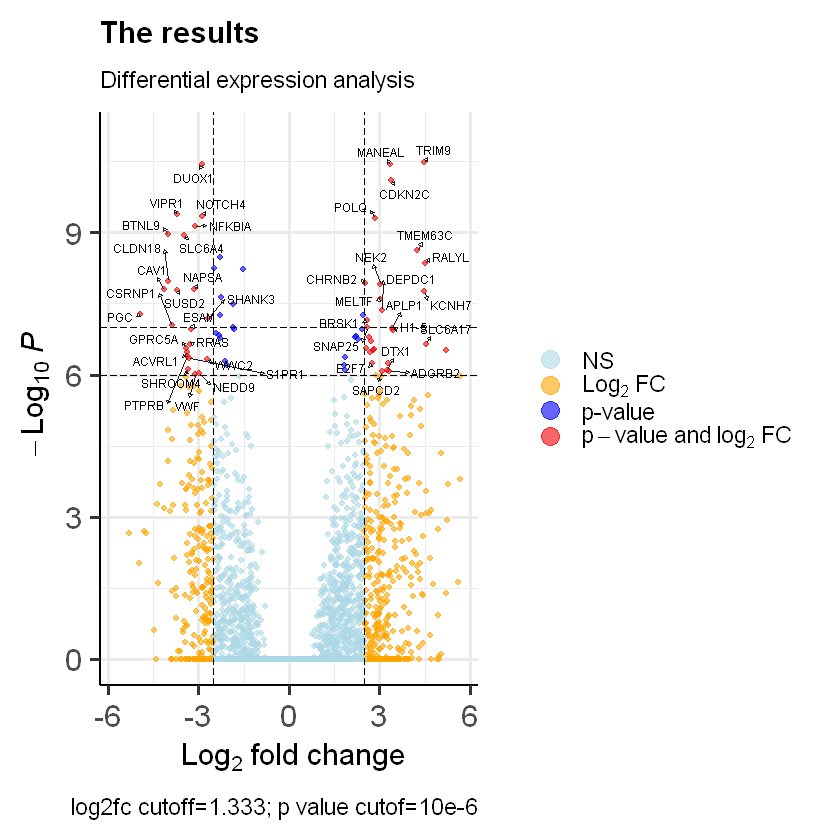

In [88]:
EnhancedVolcano(
  res,
  lab = dataset$Gene.Name,
  x = 'log2FoldChange',
  y = 'padj',
  pCutoff = 10e-7,
  FCcutoff = 2.5,
  xlim = c(-5.7, 5.7),
  ylim = c(0, -log10(10.2e-12)),
  pointSize = 1.3,
  labSize = 2.6,
  title = 'The results',
  subtitle = 'Differential expression analysis',
  caption = 'log2fc cutoff=1.333; p value cutof=10e-6',
  legendPosition = "right",
  legendLabSize = 14,
  col = c('lightblue', 'orange', 'blue', 'red2'),
  colAlpha = 0.6,
  drawConnectors = TRUE,
  hline = c(10e-8),
  widthConnectors = 0.5
)

Crear la visualización gráfica de grado de publicación con genes de interés marcados

Archivar los datos finales en significative.csv

In [89]:
# Crear el marco de datos final que consiste en resultados deseq ordenados basados en log2fc

# Create the final dataframe consisting of ordered DESeq results based on log2FoldChange
resord = as.data.frame(res)
finaltable = cbind(dataset$Gene.Name, resord)
finaltable = finaltable[order(finaltable$log2FoldChange), ]
write.table(finaltable,
            file = '/Users/alejo/OneDrive/Escritorio/oncology_diff_express/finaltable_ori.csv',
            sep = ',',
            col.names = NA)

# Filtrar genes con cambios de expresión significativos (positivos o negativos)
# Usamos el criterio p-value ajustado < 10e-7 y log2FoldChange ≥ 2.5 o ≤ -2.5
significativos <- resord[which(resord$padj < 10e-7 &
                                 (resord$log2FoldChange >= 2.5 |
                                    resord$log2FoldChange <= -2.5)), ]

# Asegurarse de que los nombres de los genes estén alineados con las filas de resultados significativos
# Filtramos solo aquellos genes que están en `significativos`
significativos_table <- significativos
significativos_table$Gene.Name <- rownames(significativos)

# Renombrar la columna de los nombres de los genes para mayor claridad
colnames(significativos_table)[ncol(significativos_table)] <- "Gene.Name"

# Guardar el archivo CSV con los genes significativos
write.table(
  significativos_table,
  file = '/Users/laura/OneDrive/Escritorio/diff_expression/significative.csv',
  sep = ',',
  row.names = FALSE,
  col.names = TRUE
)

Visualización de la data final generada

In [92]:
# Cargar datos desde el archivo CSV
results <- read.csv('/Users/alejo/OneDrive/Escritorio/diff_expression/significative.csv', header=FALSE)

# Separar las columnas por los nombres
colnames(results) <- c("baseMean", "log2FoldChange", "lfcSE", "stat", "pvalue", "padj", "Gene.Name")

# Crear un dataframe solo con Gene.Name
gene_name_table <- data.frame(Gene.Name = results$Gene.Name)

# Mostrar la tabla
View(gene_name_table)


Gene.Name
<chr>
Gene.Name
CELSR3
MAPK8IP2
GPRC5A
DEPDC1
POLQ
CLDN18
RAD54L
PGC
